In [3]:
import pandas as pd

dataset = 'amz-beauty'
source_path = f'raw_data/P5/{dataset}/reviews.pickle'

# text = summary + \n + reviewText (queda una mica lleig en el csv ngl)

df = pd.DataFrame(pd.read_pickle(source_path))

df.head(1)

,user,item,rating,text,sentence
0,A1YJEY40YUW4SE,7806397051,1,Don't waste your money\nVery oily and creamy. ...,NaN


In [4]:
target_path = f'data/{dataset}/reviews.csv'

df = df[['user', 'item', 'rating', 'text']] # drop the sentence column (the sentries toolkit)
df.to_csv(target_path, index=False)

df.head(1)

,user,item,rating,text
0,A1YJEY40YUW4SE,7806397051,1,Don't waste your money\nVery oily and creamy. ...


## Data origin check

In [5]:
# From P5 raw_data, executing Lei Li's Sentires guide and keeping all the output of the toolkit,
# i.e. the sentence column with a list of tuples (feature, opinion, sentence, sentiment')

import pandas as pd

dataset = 'amz-beauty'
source_path = f'raw_data/P5/{dataset}/reviews.pickle'

df1 = pd.DataFrame(pd.read_pickle(source_path))

df1.head(1)

,user,item,rating,text,sentence
0,A1YJEY40YUW4SE,7806397051,1,Don't waste your money\nVery oily and creamy. ...,NaN


In [8]:
# From P5, the original files from Julian Mc Auley 5-core 2015 Amazon product & reviews dataset
df2 = pd.read_json(f'raw_data/P5/{dataset}/reviews.json.gz', compression='gzip', lines=True)

df2.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014"


In [9]:
df = pd.merge(df1, df2, left_on=['user', 'item'], right_on=['reviewerID', 'asin']).drop(columns=['reviewerID', 'asin'])

print(df.shape[0], 'reivews')
assert df.shape[0] == df1.shape[0] == df2.shape[0] # Oh això funciona així directament comparar 3 coses

# The text is exactly this:
(df['text'] == df['summary'] + "\n" + df['reviewText']).all()

df.head(1)

198502 reivews


,user,item,rating,text,sentence,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,1,Don't waste your money\nVery oily and creamy. ...,NaN,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014"


<Axes: >

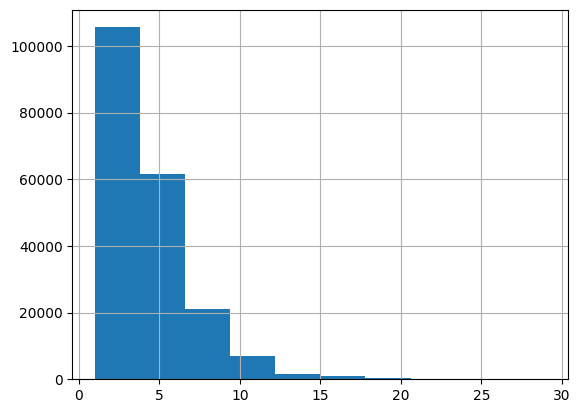

In [12]:
df['summary'].str.split().str.len().hist() # les summaries tendeixen a ser curtes

<Axes: >

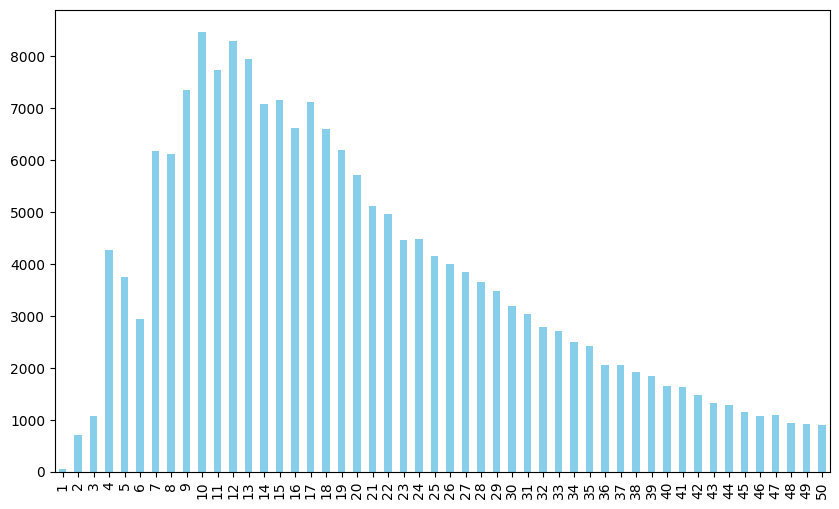

In [14]:
df['summary'].str.len().value_counts().sort_index()[:50].plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: ylabel='Frequency'>

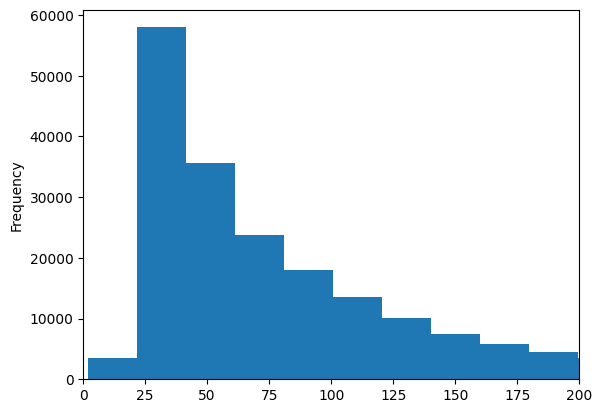

In [10]:
df['text'].str.split().str.len().plot(kind='hist', bins=200, xlim=(0, 200)) # juntat la review pot ser molt llarg

<Axes: >

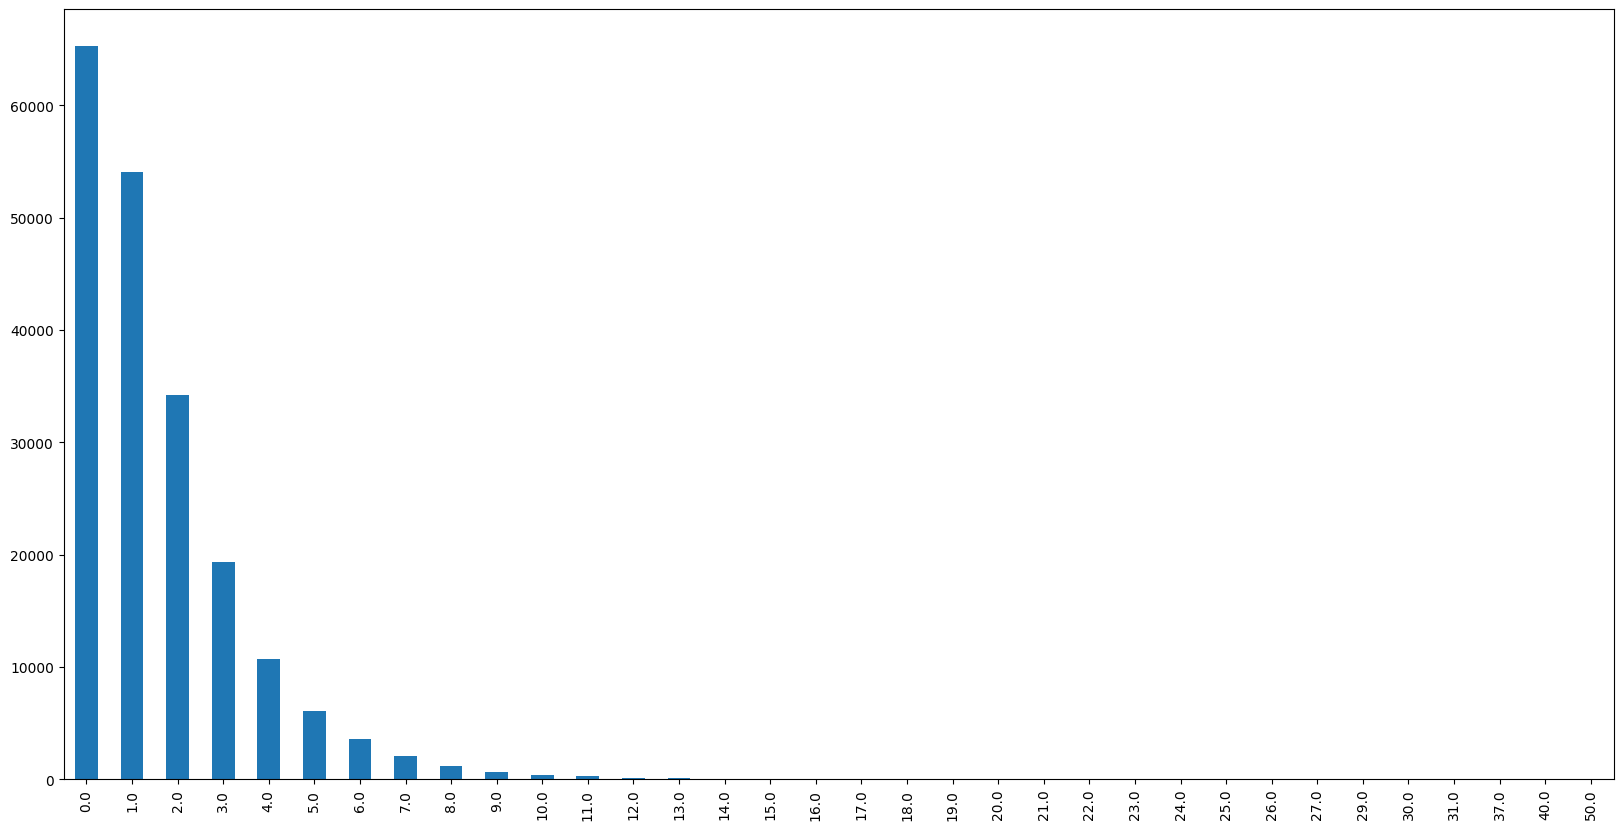

In [11]:
# He descartat però de moment les sentenes, pq em complica el codi de PETER sense aportar gaire
# i a més costa moltíssim de generar per noves dades, i.e. molt més cost del que m'aporta
df['sentence'].str.len().fillna(0).value_counts().sort_index().plot(kind='bar', figsize=(20, 10))

<Axes: ylabel='overall'>

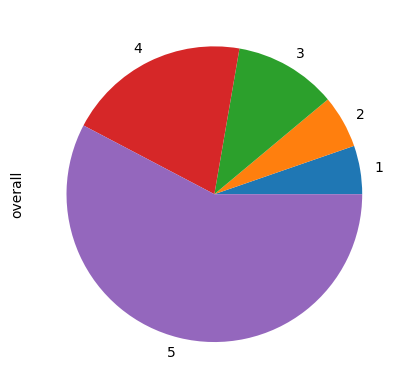

In [13]:
df['overall'].value_counts().sort_index().plot(kind='pie') # les reviews tendeixen a ser bones